In [1]:
import torch
import torchvision
from torchvision.transforms import v2
from torch.utils.data import DataLoader, random_split, ConcatDataset

NUM_CLASSES = 37
BATCH_SIZE = 256
IMAGE_SIZE = 128

# Load the dataset
## Note: Resize is done as DataLoader does not support different image sizes
train_dataset = torchvision.datasets.OxfordIIITPet(root='./data', split='trainval', download=False, transform=v2.Compose([v2.ToImage(),v2.Resize((IMAGE_SIZE, IMAGE_SIZE))]),
                        target_transform=v2.Lambda(lambda x: torch.nn.functional.one_hot(torch.tensor(x), num_classes=NUM_CLASSES)) )
temp_val_dataset = torchvision.datasets.OxfordIIITPet(root='./data', split='test', download=False, transform=v2.Compose([v2.ToImage(),v2.Resize((IMAGE_SIZE, IMAGE_SIZE))]),
                        target_transform=v2.Lambda(lambda x: torch.nn.functional.one_hot(torch.tensor(x), num_classes=NUM_CLASSES)) )
   
# Define the split ratio for val_dataset
part_train_size = int(0.7 * len(temp_val_dataset))
val_size = len(temp_val_dataset) - part_train_size

# Split the dataset into part_training and testing sets
part_train_dataset, val_dataset = random_split(temp_val_dataset, [part_train_size, val_size], generator=torch.Generator().manual_seed(42))
# part_train_dataset = torch.utils.data.Subset(temp_val_dataset, range(part_train_size))
# val_dataset = torch.utils.data.Subset(temp_val_dataset, range(part_train_size, len(temp_val_dataset)))
# Combine the datasets back into a single dataset
train_dataset = ConcatDataset([train_dataset, part_train_dataset])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Print the sizes of the datasets
print(f"Training dataset size: {len(train_dataset)}")
print(f"Testing dataset size: {len(val_dataset)}")

Training dataset size: 6248
Testing dataset size: 1101


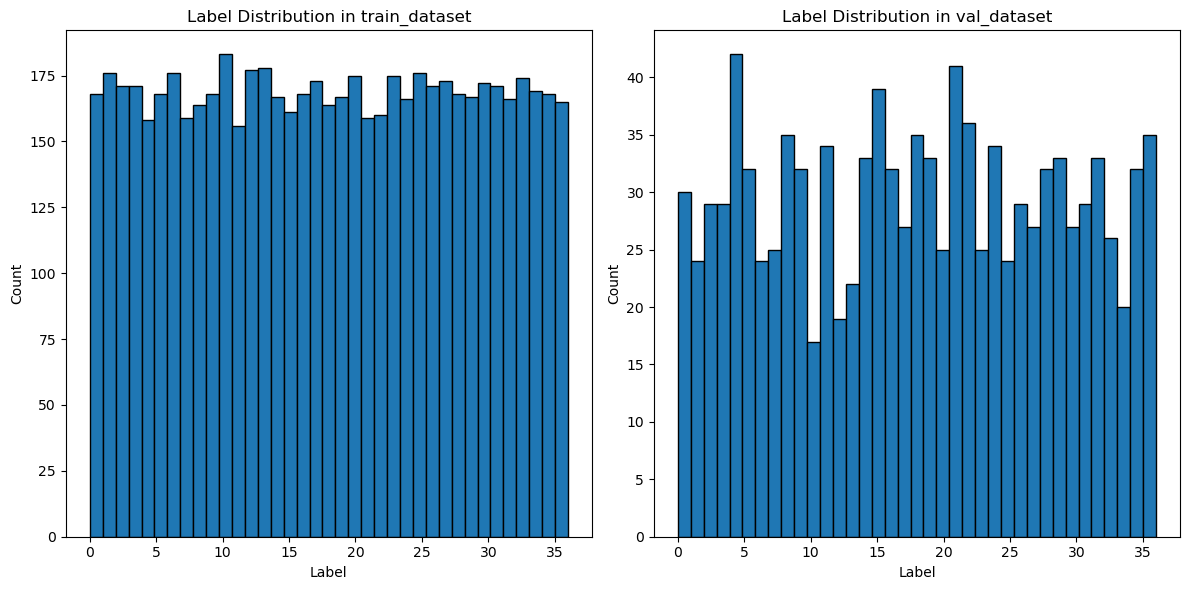

In [2]:
import matplotlib.pyplot as plt

# Convert one-hot encoded labels to original form
train_labels = [torch.argmax(label).item() for _, label in train_dataset]
val_labels = [torch.argmax(label).item() for _, label in val_dataset]

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram for train_dataset
axs[0].hist(train_labels, bins=NUM_CLASSES, edgecolor='black')
axs[0].set_title('Label Distribution in train_dataset')
axs[0].set_xlabel('Label')
axs[0].set_ylabel('Count')

# Plot histogram for val_dataset
axs[1].hist(val_labels, bins=NUM_CLASSES, edgecolor='black')
axs[1].set_title('Label Distribution in val_dataset')
axs[1].set_xlabel('Label')
axs[1].set_ylabel('Count')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

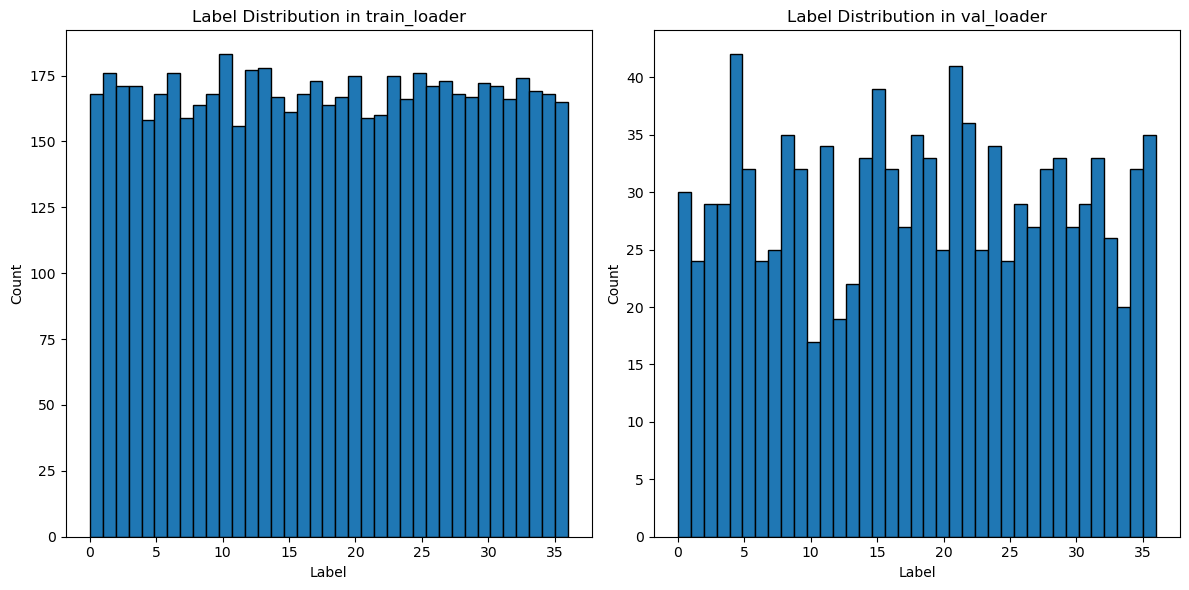

In [3]:
import matplotlib.pyplot as plt

# Extract labels from train_loader
train_labels = []
for _, labels in train_loader:
    class_indices = torch.argmax(labels, dim=1)
    train_labels.extend(class_indices.tolist())

# Extract labels from val_loader
val_labels = []
for _, labels in val_loader:
    class_indices = torch.argmax(labels, dim=1)
    val_labels.extend(class_indices.tolist())

# Create histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(train_labels, bins=NUM_CLASSES, edgecolor='black')
plt.title('Label Distribution in train_loader')
plt.xlabel('Label')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(val_labels, bins=NUM_CLASSES, edgecolor='black')
plt.title('Label Distribution in val_loader')
plt.xlabel('Label')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [4]:
a=train_dataset[0][0]
print(a.shape)
a

torch.Size([3, 128, 128])


Image([[[ 36,  36,  37,  ..., 253, 251, 249],
        [ 37,  38,  35,  ..., 255, 254, 253],
        [ 39,  46,  60,  ..., 255, 255, 255],
        ...,
        [  5,  45,  45,  ...,  62,  58,  61],
        [  5,  12,  42,  ...,  60,  59,  58],
        [  8,   8,   9,  ...,  58,  61,  62]],

       [[ 19,  19,  19,  ..., 252, 251, 249],
        [ 19,  20,  18,  ..., 255, 254, 253],
        [ 21,  26,  35,  ..., 255, 255, 255],
        ...,
        [  9,  46,  47,  ..., 105,  92,  91],
        [  8,  14,  43,  ...,  98, 100,  90],
        [  9,  10,  11,  ...,  89,  99, 102]],

       [[ 11,  11,  12,  ..., 254, 253, 253],
        [ 12,  12,  10,  ..., 255, 254, 254],
        [ 13,  14,  17,  ..., 255, 255, 255],
        ...,
        [ 29,  58,  58,  ..., 229, 207, 206],
        [ 26,  29,  51,  ..., 223, 224, 219],
        [ 25,  25,  26,  ..., 219, 228, 229]]], dtype=torch.uint8, )

In [5]:
b=v2.CenterCrop(int(IMAGE_SIZE * 0.85))(a)
print(b.shape)
b

torch.Size([3, 108, 108])


Image([[[254, 255, 255,  ..., 255, 254, 255],
        [254, 255, 255,  ..., 255, 255, 255],
        [253, 254, 254,  ..., 255, 255, 255],
        ...,
        [ 29,  27,  27,  ..., 252, 253, 253],
        [ 27,  25,  24,  ..., 241, 242, 243],
        [ 25,  24,  22,  ..., 248, 246, 245]],

       [[254, 254, 254,  ..., 255, 254, 255],
        [254, 254, 254,  ..., 255, 255, 255],
        [253, 253, 253,  ..., 255, 255, 255],
        ...,
        [ 32,  29,  29,  ..., 253, 253, 254],
        [ 30,  27,  24,  ..., 243, 243, 244],
        [ 27,  25,  21,  ..., 249, 247, 246]],

       [[131, 133, 138,  ..., 255, 254, 255],
        [133, 137, 142,  ..., 255, 255, 255],
        [140, 139, 144,  ..., 255, 255, 255],
        ...,
        [118, 113, 112,  ..., 253, 254, 254],
        [112, 107, 100,  ..., 246, 246, 247],
        [105,  98,  88,  ..., 250, 248, 248]]], dtype=torch.uint8, )

In [6]:
c=v2.Resize((100, 100))(b)
print(c.shape)
c

torch.Size([3, 100, 100])


Image([[[254, 255, 255,  ..., 255, 254, 255],
        [254, 255, 255,  ..., 255, 255, 255],
        [237, 248, 254,  ..., 255, 255, 255],
        ...,
        [ 29,  28,  27,  ..., 253, 253, 253],
        [ 27,  25,  25,  ..., 243, 244, 245],
        [ 25,  24,  22,  ..., 247, 246, 245]],

       [[254, 254, 254,  ..., 255, 254, 255],
        [254, 254, 254,  ..., 255, 255, 255],
        [240, 248, 253,  ..., 255, 255, 255],
        ...,
        [ 33,  30,  30,  ..., 253, 253, 254],
        [ 30,  27,  25,  ..., 245, 245, 246],
        [ 27,  24,  22,  ..., 248, 247, 246]],

       [[131, 134, 139,  ..., 255, 254, 255],
        [134, 138, 143,  ..., 255, 255, 255],
        [144, 141, 147,  ..., 255, 255, 255],
        ...,
        [119, 116, 114,  ..., 253, 254, 254],
        [112, 107, 102,  ..., 247, 247, 248],
        [105,  97,  91,  ..., 250, 248, 248]]], dtype=torch.uint8, )

In [7]:
d=v2.RandomHorizontalFlip(p=1)(c)
print(d.shape)
d

torch.Size([3, 100, 100])


Image([[[255, 254, 255,  ..., 255, 255, 254],
        [255, 255, 255,  ..., 255, 255, 254],
        [255, 255, 255,  ..., 254, 248, 237],
        ...,
        [253, 253, 253,  ...,  27,  28,  29],
        [245, 244, 243,  ...,  25,  25,  27],
        [245, 246, 247,  ...,  22,  24,  25]],

       [[255, 254, 255,  ..., 254, 254, 254],
        [255, 255, 255,  ..., 254, 254, 254],
        [255, 255, 255,  ..., 253, 248, 240],
        ...,
        [254, 253, 253,  ...,  30,  30,  33],
        [246, 245, 245,  ...,  25,  27,  30],
        [246, 247, 248,  ...,  22,  24,  27]],

       [[255, 254, 255,  ..., 139, 134, 131],
        [255, 255, 255,  ..., 143, 138, 134],
        [255, 255, 255,  ..., 147, 141, 144],
        ...,
        [254, 254, 253,  ..., 114, 116, 119],
        [248, 247, 247,  ..., 102, 107, 112],
        [248, 248, 250,  ...,  91,  97, 105]]], dtype=torch.uint8, )

In [8]:
torch.manual_seed(43)
e=v2.ColorJitter(hue=0.45)(d)
e

Image([[[255, 254, 255,  ..., 255, 255, 254],
        [255, 255, 255,  ..., 255, 255, 254],
        [255, 255, 255,  ..., 254, 248, 240],
        ...,
        [253, 253, 253,  ...,  27,  28,  29],
        [245, 244, 243,  ...,  25,  25,  27],
        [245, 246, 247,  ...,  22,  24,  25]],

       [[255, 254, 255,  ..., 158, 154, 152],
        [255, 255, 255,  ..., 161, 157, 154],
        [255, 255, 255,  ..., 164, 159, 163],
        ...,
        [254, 254, 253,  ..., 102, 103, 108],
        [248, 247, 247,  ...,  89,  95, 100],
        [248, 248, 250,  ...,  79,  84,  93]],

       [[255, 254, 255,  ..., 139, 134, 131],
        [255, 255, 255,  ..., 143, 138, 134],
        [255, 255, 255,  ..., 147, 141, 144],
        ...,
        [254, 254, 253,  ..., 114, 116, 119],
        [248, 247, 246,  ..., 102, 107, 112],
        [248, 248, 250,  ...,  91,  97, 105]]], dtype=torch.uint8, )

In [9]:
subset_val_dataset = torch.utils.data.Subset(val_dataset, range(12))

In [10]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, transform=None):
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        img, label = self.dataset[idx]
        if self.transform:
            img = self.transform(img)
        return img, label

def aug(img):
    img = v2.CenterCrop(int(IMAGE_SIZE * 0.85))(img)
    img = v2.Resize((100, 100))(img)
    img = v2.RandomHorizontalFlip(p=1)(img)
    img = v2.ColorJitter(hue=0.45)(img)
    return img
torch.manual_seed(43)
augmented_datasets = CustomDataset(val_dataset, transform=v2.Lambda(v2.Resize((100, 100))))


In [11]:
type(augmented_datasets)

__main__.CustomDataset

In [12]:
val_dataset[2][0]

Image([[[ 99, 106, 116,  ...,  26,  26,  25],
        [100, 107, 117,  ...,  27,  26,  26],
        [101, 109, 119,  ...,  27,  27,  27],
        ...,
        [ 98, 107, 113,  ...,  24,  22,  20],
        [ 97, 105, 111,  ...,  23,  22,  20],
        [ 94, 102, 109,  ...,  25,  23,  21]],

       [[101, 108, 118,  ...,  22,  22,  21],
        [102, 109, 119,  ...,  23,  22,  22],
        [103, 111, 121,  ...,  23,  23,  23],
        ...,
        [ 99, 108, 116,  ...,  20,  19,  20],
        [ 98, 106, 114,  ...,  20,  20,  20],
        [ 97, 104, 113,  ...,  19,  19,  19]],

       [[ 98, 105, 115,  ...,  13,  13,  12],
        [ 99, 106, 116,  ...,  14,  13,  13],
        [100, 108, 118,  ...,  14,  14,  14],
        ...,
        [103, 111, 117,  ...,  11,  10,  10],
        [102, 110, 116,  ...,  11,  10,  10],
        [ 97, 109, 117,  ...,  10,  10,   9]]], dtype=torch.uint8, )

In [13]:
augmented_datasets[2][0]

Image([[[101, 110, 121,  ...,  27,  26,  25],
        [102, 112, 122,  ...,  28,  26,  26],
        [104, 115, 124,  ...,  29,  28,  27],
        ...,
        [101, 111, 117,  ...,  27,  24,  22],
        [ 99, 109, 115,  ...,  25,  22,  21],
        [ 97, 106, 112,  ...,  25,  23,  22]],

       [[103, 112, 123,  ...,  23,  22,  21],
        [104, 114, 124,  ...,  24,  22,  22],
        [106, 117, 126,  ...,  25,  24,  23],
        ...,
        [102, 113, 121,  ...,  21,  20,  19],
        [100, 111, 119,  ...,  20,  20,  20],
        [ 99, 109, 117,  ...,  19,  19,  19]],

       [[100, 109, 120,  ...,  14,  13,  12],
        [101, 111, 121,  ...,  15,  13,  13],
        [103, 114, 123,  ...,  16,  15,  14],
        ...,
        [106, 115, 122,  ...,  13,  11,  10],
        [104, 113, 120,  ...,  12,  10,  10],
        [101, 113, 119,  ...,  11,  10,   9]]], dtype=torch.uint8, )

In [14]:
v2.ToDtype(torch.float32, scale=True)(augmented_datasets[2][0])

Image([[[0.3961, 0.4314, 0.4745,  ..., 0.1059, 0.1020, 0.0980],
        [0.4000, 0.4392, 0.4784,  ..., 0.1098, 0.1020, 0.1020],
        [0.4078, 0.4510, 0.4863,  ..., 0.1137, 0.1098, 0.1059],
        ...,
        [0.3961, 0.4353, 0.4588,  ..., 0.1059, 0.0941, 0.0863],
        [0.3882, 0.4275, 0.4510,  ..., 0.0980, 0.0863, 0.0824],
        [0.3804, 0.4157, 0.4392,  ..., 0.0980, 0.0902, 0.0863]],

       [[0.4039, 0.4392, 0.4824,  ..., 0.0902, 0.0863, 0.0824],
        [0.4078, 0.4471, 0.4863,  ..., 0.0941, 0.0863, 0.0863],
        [0.4157, 0.4588, 0.4941,  ..., 0.0980, 0.0941, 0.0902],
        ...,
        [0.4000, 0.4431, 0.4745,  ..., 0.0824, 0.0784, 0.0745],
        [0.3922, 0.4353, 0.4667,  ..., 0.0784, 0.0784, 0.0784],
        [0.3882, 0.4275, 0.4588,  ..., 0.0745, 0.0745, 0.0745]],

       [[0.3922, 0.4275, 0.4706,  ..., 0.0549, 0.0510, 0.0471],
        [0.3961, 0.4353, 0.4745,  ..., 0.0588, 0.0510, 0.0510],
        [0.4039, 0.4471, 0.4824,  ..., 0.0627, 0.0588, 0.0549],
        ..

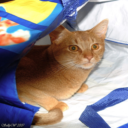

In [15]:
v2.ToPILImage()(train_dataset[0][0])